[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ai2es/WAF_ML_Tutorial_Part1/blob/main/MOOC_Notebooks/Notebook05_SimpleMLRegression.ipynb)

# Notebook 05: Simple ML Regression [MOOC Colab Version]

Authors: Randy J. Chase, David R. Harrison, Amanda Burke, Gary M. Lackmann, and Amy McGovern<br>
Institution: [AI2ES](https://www.ai2es.org)<br>
Associated paper: [A Machine Learning Tutorial for Operational Meteorology. Part I: Traditional Machine Learning](https://journals.ametsoc.org/view/journals/wefo/37/8/WAF-D-22-0070.1.xml)<br>
Original Github: [WAF_ML_Tutorial_Part1](https://github.com/ai2es/WAF_ML_Tutorial_Part1)

If you use this code or data in your work, please cite the paper: 

Chase, R. J., Harrison, D. R., Burke, A., Lackmann, G. M., & McGovern, A. (2022). A Machine Learning Tutorial for Operational Meteorology. Part I: Traditional Machine Learning, Weather and Forecasting, 37(8), 1509-1529.

### Goal: Basic training a ML using a single feature/predictor/input and a single ML model

#### Reminder of Problem Statement

Before we jump into the ML, I want to remind you of the ML task we want to accomplish in the paper. 

1. Does this image contain a thunderstorm? <-- Classification
2. How many lightning flashes are in this image? <-- Regression

#### Background

For the training of regression problems is basically the same as the classification. We will still use the same steps as the previous notebook, just with a small changed to the labels ```y```. 


#### Step 0: Get the github repo (we need some of the functions there)

The first step with all of these Google Colab notebooks will be to grab the github repo and cd into the notebooks directory. 

To run things from the command line, put a ```!``` before your code

In [1]:
#get the github repo 
!git clone https://github.com/ai2es/WAF_ML_Tutorial_Part1.git 

#cd into the repo so the paths work 
import os 
os.chdir('/content/WAF_ML_Tutorial_Part1/jupyter_notebooks/')

Cloning into 'WAF_ML_Tutorial_Part1'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 301 (delta 139), reused 236 (delta 96), pack-reused 0
Receiving objects: 100% (301/301), 195.77 MiB | 26.08 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Checking out files: 100% (100/100), done.


#### Step 1 & 2: Import packages and load data for Regression  
We only want 1 feature again to make things simple, which is feature 0. We also will need to change ```class_labels``` to false.

In [2]:
#needed packages 
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

#plot parameters that I personally like, feel free to make these your own.
import matplotlib
matplotlib.rcParams['axes.facecolor'] = [0.9,0.9,0.9] #makes a grey background to the axis face
matplotlib.rcParams['axes.labelsize'] = 14 #fontsize in pts
matplotlib.rcParams['axes.titlesize'] = 14 
matplotlib.rcParams['xtick.labelsize'] = 12 
matplotlib.rcParams['ytick.labelsize'] = 12 
matplotlib.rcParams['legend.fontsize'] = 12 
matplotlib.rcParams['legend.facecolor'] = 'w' 
matplotlib.rcParams['savefig.transparent'] = False

#make default resolution of figures much higher (i.e., High definition)
%config InlineBackend.figure_format = 'retina'

#import some helper functions for our other directory.
import sys
sys.path.insert(1, '../scripts/')
from aux_functions import load_n_combine_df
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(path_to_data='../datasets/sevir/',features_to_keep=np.arange(0,1,1),class_labels=False)

Let's check to make sure the labels are indeed decimal numbers instead of 0's and 1's. 

Text(0.5, 0, 'number of flahses')

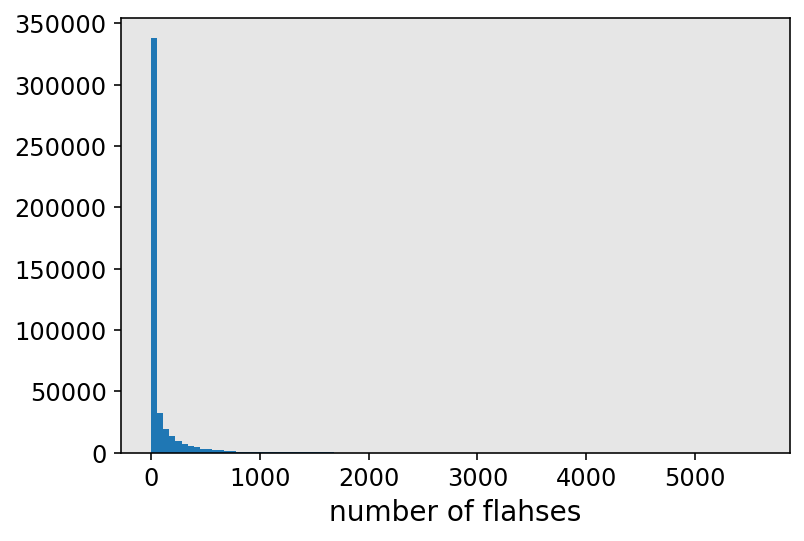

In [3]:
plt.hist(y_train,bins=100)
plt.xlabel('number of flahses')

Great, it is indeed more than just 0's and 1's, but something you'll notice right here, there are ALOT of no flash images. You will see if we plot the number of flashes as a function of the minimum brightness temperature it might be very difficult to fit a linear method (i.e., Linear regression) to the data

Text(0, 0.5, 'Number of flashes')

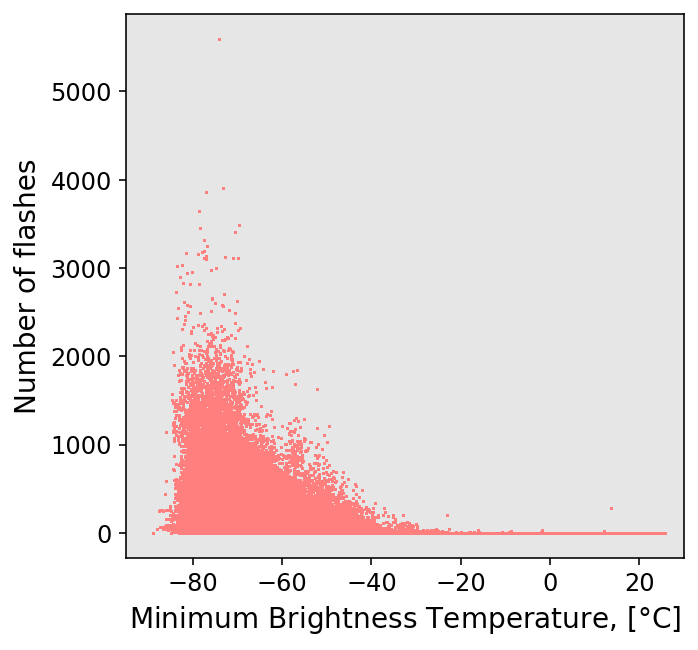

In [4]:
#this is something to help make the ticks show up where I want them 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#color I like. The order of ratios is [Red,Green,Blue]
r = [255/255,127/255,127/255]

#make figure  
fig = plt.figure(figsize=(5,5))
#set background color to white so we can copy paste out of the notebook if we want 
fig.set_facecolor('w')

#get axis for drawing
ax = plt.gca()

#plot data 
ax.scatter(X_train[:,0],y_train,color=r,s=1,marker='+')

#set limits 
ax.set_xlim([-95,30])
#label axes
ax.set_xlabel('Minimum Brightness Temperature, [$\degree$C]')
ax.set_ylabel('Number of flashes')

For now, lets try it anyway 

#### Step 3: Initialize model

Same as with classification, we can use the ```()``` after the model name to initialize a ML model.

In [5]:
#load model from sklearn
from sklearn.linear_model import LinearRegression

#initialize
model = LinearRegression()

print(model)

LinearRegression()


#### Step 4: Train your ML model! 

In [6]:
model = model.fit(X_train,y_train)

#### Step 5: Evaluate your ML model

As a sanity check, we will first look at the *one-to-one* plot where the x-axis is the predicted number of flashes, and the y-axis is the true number of flashes. A perfect prediction will be directly along the diagonal. 

Text(0.5, 0, 'GLM measurement, [$number of flashes$]')

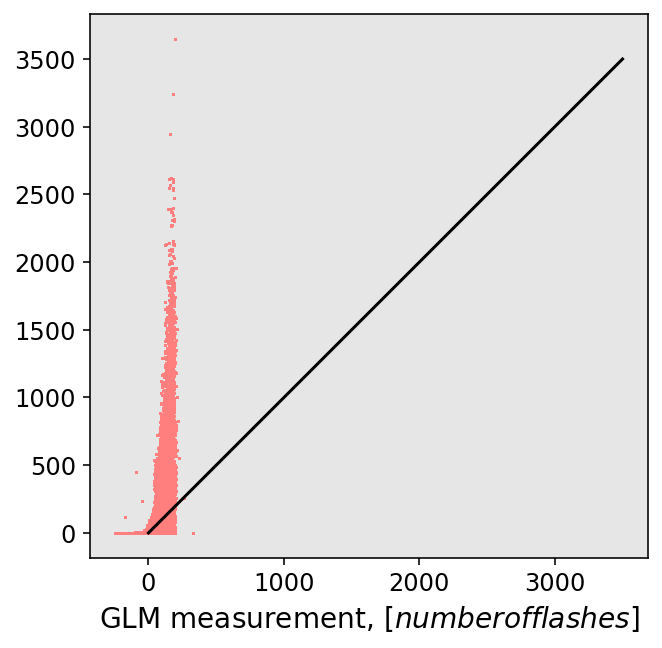

In [7]:
#get predictions 
yhat = model.predict(X_validate)

#make figure  
fig = plt.figure(figsize=(5,5))
#set background color to white so we can copy paste out of the notebook if we want 
fig.set_facecolor('w')

#get axis for drawing
ax = plt.gca()

#plot data 
ax.scatter(yhat,y_validate,color=r,s=1,marker='+')
ax.plot([0,3500],[0,3500],'-k')
ax.set_xlabel('ML Prediction, [$number of flashes$]')
ax.set_xlabel('GLM measurement, [$number of flashes$]')

As you can see, there is not a great correspondence between the ML model predicted flashes and the true number of flashes. One work around of this issue is to train on instances where there is already more than 1 lightning flash. While this might seem like cheating, based on our > 90% accurate classification model, we could use the two ML models in tandem. In other words, we could use the regression model only on images classified to contain flashes from the classification model. So let's drop the zeros out of the dataset and give it a try.

1


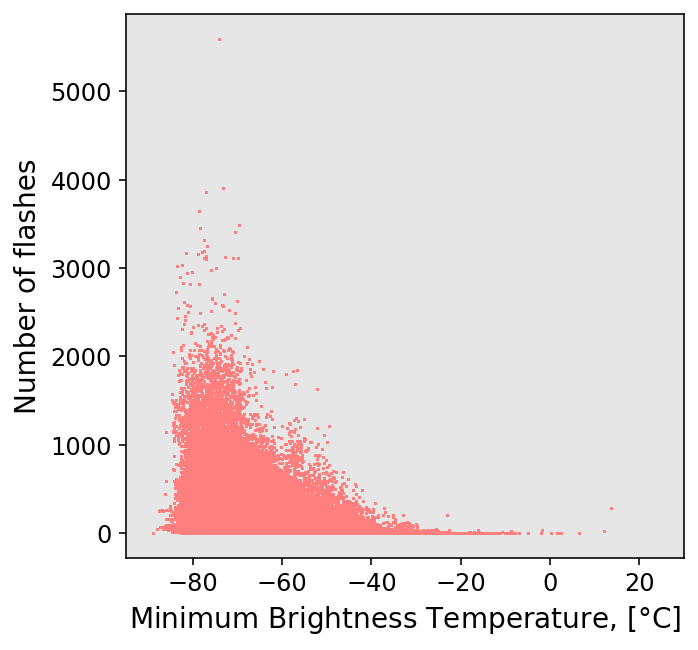

In [8]:
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(path_to_data='../datasets/sevir/',features_to_keep=np.arange(0,1,1),class_labels=False,dropzeros=True)

#remake scatter plot from Step 2
#make figure  
fig = plt.figure(figsize=(5,5))
#set background color to white so we can copy paste out of the notebook if we want 
fig.set_facecolor('w')

#get axis for drawing
ax = plt.gca()

#plot data 
ax.scatter(X_train[:,0],y_train,color=r,s=1,marker='+')

#set limits 
ax.set_xlim([-95,30])
#label axes
ax.set_xlabel('Minimum Brightness Temperature, [$\degree$C]')
ax.set_ylabel('Number of flashes')


print(np.min(y_train))

Good, there are no 0s in the label vector (```y```). Now let's re-train the model

In [9]:
model = model.fit(X_train,y_train)

Text(0.5, 0, 'GLM measurement, [$number of flashes$]')

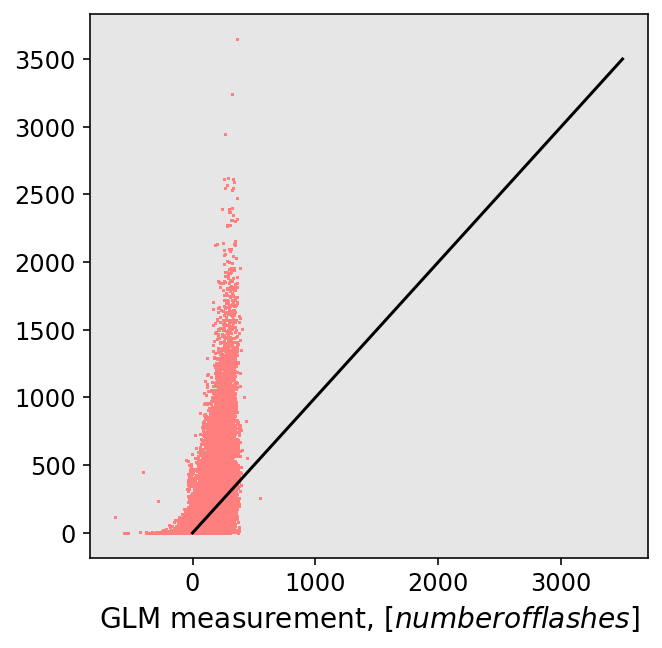

In [10]:
#get predictions 
yhat = model.predict(X_validate)

#make figure  
fig = plt.figure(figsize=(5,5))
#set background color to white so we can copy paste out of the notebook if we want 
fig.set_facecolor('w')

#get axis for drawing
ax = plt.gca()

#plot data 
ax.scatter(yhat,y_validate,color=r,s=1,marker='+')
ax.plot([0,3500],[0,3500],'-k')
ax.set_xlabel('ML Prediction, [$number of flashes$]')
ax.set_xlabel('GLM measurement, [$number of flashes$]')

It's better. but still doesn’t look great. But given the relatively non-linear relationship between the minimum brightness temperature and the number of flashes, this is probably to be expected. Let's calculate some metrics to quantitatively evaluate the trained ML model.

The metrics for regression are a bit different than for classification. Common metrics are the mean bias, mean absolute error (MAE), Root Mean Square Error (RMSE) and the coefficient of determination (R^2). Mathematically, these metrics are defined: 

$$ \mathrm{Bias} =  \frac{1}{N} \sum_{j=1}^{N} (y_j - \hat{y}_j) $$

$$ \mathrm{MAE} = \frac{1}{N} \sum_{j=1}^{N} |y_j - \hat{y}_j| $$

$$ \mathrm{RMSE} = \sqrt{\frac{1}{N}  \sum_{j=1}^{N} (y_j - \hat{y}_j)^{2}} $$ 

$$ \mathrm{R^{2}} = 1 - \frac{\sum_{j=1}^{N} (y_j - \hat{y}_j)^{2}}{\sum_{j=1}^{N} (y_j - \bar{y})^{2}} $$

We have included all of these metrics again in the ```gewitter_functions.py``` script.

In [11]:
from gewitter_functions import get_mae,get_rmse,get_bias,get_r2

yhat = model.predict(X_validate)
mae = get_mae(y_validate,yhat)
rmse = get_rmse(y_validate,yhat)
bias = get_bias(y_validate,yhat)
r2 = get_r2(y_validate,yhat)

#print them out so we can see them 
print('MAE:{} flashes, RMSE:{} flashes, Bias:{} flashes, Rsquared:{}'.format(np.round(mae,2),np.round(rmse,2),np.round(bias,2),np.round(r2,2)))

MAE:146.68 flashes, RMSE:235.46 flashes, Bias:30.98 flashes, Rsquared:0.2


There we go! We have a simple linear regression predicting the number of flashes in an image. While these results don’t look great (missing on average by 30 flashes) we will show in the more advanced ML model (using more features) that we can get a more accurate model.

#### Step 6: Save your trained model

Sometimes loading the training dataset and re-training the model each time can be cumbersome. There is a way to save the trained models. We will use the python ```pickle``` package, I know kinda an odd name, to do this.

In [12]:
import pickle
name = 'LinearRegression.pkl'
start_path = '../datasets/sklearnmodels/regression/onefeature/'
savefile = open(start_path + name,'wb')
pickle.dump(model,savefile)

FileNotFoundError: ignored

#### Step 7: Load a saved model

Now that you have it saved, if you need to load it do the following:

In [ ]:
import pickle
name = 'LinearRegression.pkl'
start_path = '../datasets/sklearnmodels/regression/onefeature/'
#notice the change from wb to rb 
savefile = open(start_path + name,'rb')
#notice the change from dump to load 
model = pickle.load(savefile)

print(model)

LinearRegression()


In the next notebook we will look at training a ML model with all 36 predictors. Notebook 6 is for classification, while Notebook 7 is for regression.